In [1]:
import numpy as np

import analyze_control as ac

# 従来の計算方法との比較

#### 暖房

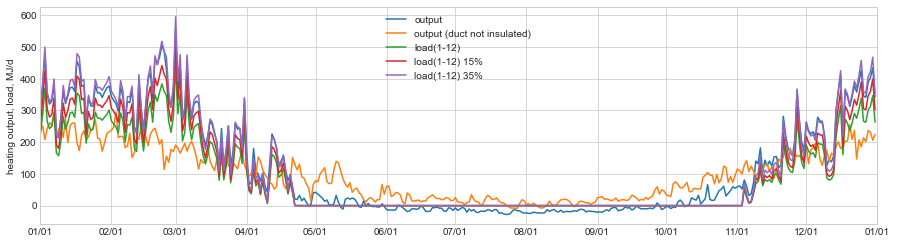

In [2]:
data = [
    (ac.get_heat_source_heating_output(6), 'output'),
    (ac.get_heat_source_heating_output(9), 'output (duct not insulated)'),
    (np.sum(ac.get_heating_load(6), axis=0), 'load(1-12)'),
    (np.sum(ac.get_heating_load(6), axis=0) * 1.15, 'load(1-12) 15%'),
    (np.sum(ac.get_heating_load(6), axis=0) * 1.35, 'load(1-12) 35%')
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')

#### 冷房顕熱

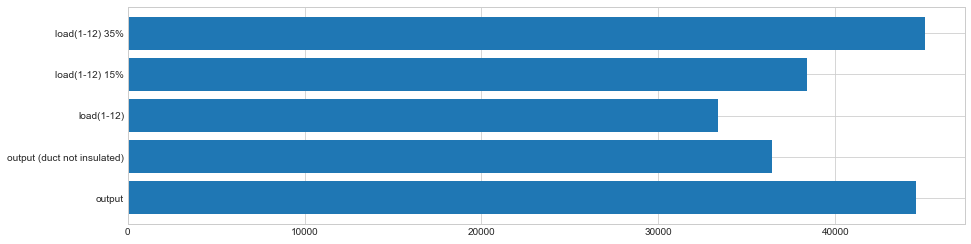

In [3]:
ac.draw_sum_bar_graph('test',data)

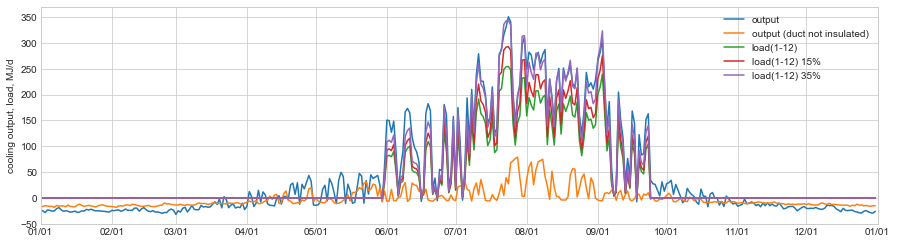

In [4]:
data = [
    (ac.get_heat_source_sensible_cooling_output(6), 'output'),
    (ac.get_heat_source_sensible_cooling_output(9), 'output (duct not insulated)'),
    (np.sum(ac.get_sensible_cooling_load(6), axis=0), 'load(1-12)'),
    (np.sum(ac.get_sensible_cooling_load(6), axis=0) * 1.15, 'load(1-12) 15%'),
    (np.sum(ac.get_sensible_cooling_load(6), axis=0) * 1.35, 'load(1-12) 35%')
]

ac.draw_graph('cooling output, load, MJ/d', data, op='itg')

#### 冷房潜熱

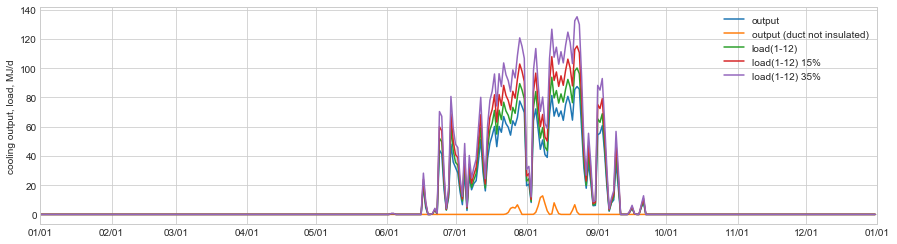

In [5]:
data = [
    (ac.get_heat_source_latent_cooling_output(6), 'output'),
    (ac.get_heat_source_latent_cooling_output(9), 'output (duct not insulated)'),
    (np.sum(ac.get_latent_cooling_load(6), axis=0), 'load(1-12)'),
    (np.sum(ac.get_latent_cooling_load(6), axis=0) * 1.15, 'load(1-12) 15%'),
    (np.sum(ac.get_latent_cooling_load(6), axis=0) * 1.35, 'load(1-12) 35%')
]

ac.draw_graph('cooling output, load, MJ/d', data, op='itg')

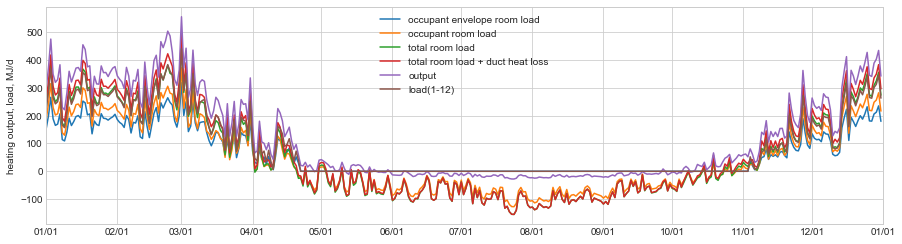

In [6]:
case = 6
data = [
    (np.sum(ac.get_heating_load(case)[0:5], axis=0), 'occupant envelope room load'),
    (np.sum(ac.get_heating_load(case)[0:5], axis=0) + np.sum(ac.get_heat_loss_through_partition_for_heating(case), axis=0), 'occupant room load'),
    (np.sum(ac.get_heating_load(case)[0:5], axis=0) + np.sum(ac.get_heat_loss_through_partition_for_heating(case), axis=0) + ac.get_non_occupant_room_load(case), 'total room load'),
    (np.sum(ac.get_heating_load(case)[0:5], axis=0) + np.sum(ac.get_heat_loss_through_partition_for_heating(case), axis=0) + ac.get_non_occupant_room_load(case) + np.sum(ac.get_duct_heat_loss_for_heating(case), axis=0), 'total room load + duct heat loss'),
    (ac.get_heat_source_heating_output(case), 'output'),
    (np.sum(ac.get_heating_load(6), axis=0), 'load(1-12)')
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')

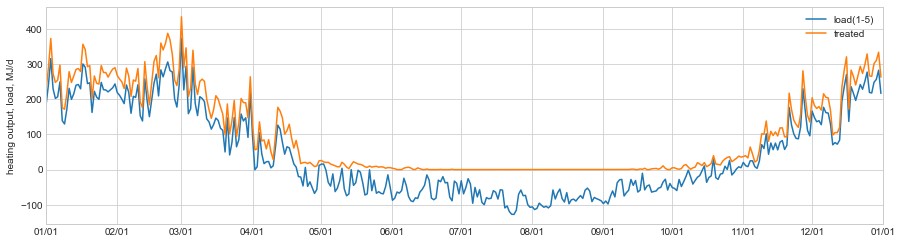

In [7]:
data = [
    (np.sum(ac.get_heating_load(6)[0:5], axis=0) + np.sum(ac.get_heat_loss_through_partition_for_heating(6), axis=0), 'load(1-5)'),
    (np.sum(ac.get_actual_treated_load_for_heating(6), axis=0), 'treated')
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')

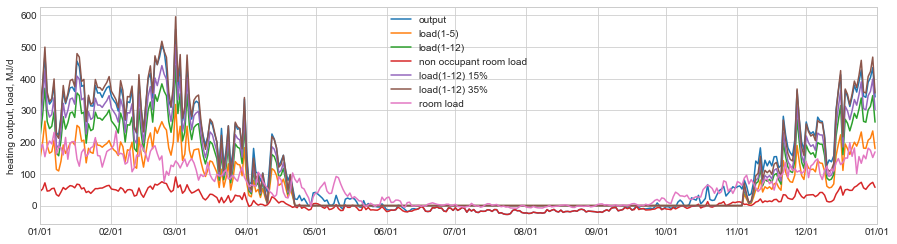

In [8]:
data = [
    (ac.get_heat_source_heating_output(6), 'output'),
    (np.sum(ac.get_heating_load(6)[0:5], axis=0), 'load(1-5)'),
    (np.sum(ac.get_heating_load(6), axis=0), 'load(1-12)'),
    (ac.get_non_occupant_room_load(6), 'non occupant room load'),
    (np.sum(ac.get_heating_load(6), axis=0) * 1.15, 'load(1-12) 15%'),
    (np.sum(ac.get_heating_load(6), axis=0) * 1.35, 'load(1-12) 35%'),
    (np.sum(ac.get_heating_load(9)[0:5], axis=0) + ac.get_non_occupant_room_load(9), 'room load')
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')

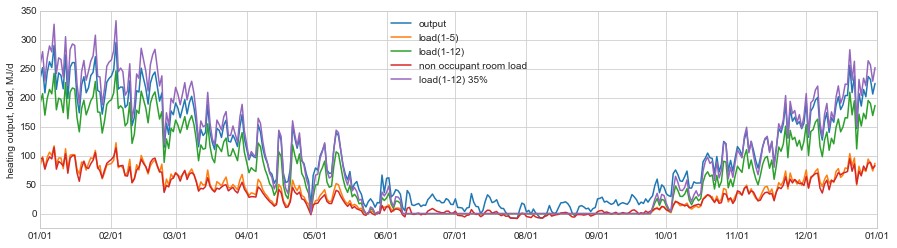

In [9]:
v_ho = ac.get_heat_source_heating_output(9)
v_hl = np.sum(ac.get_heating_load(9)[0:5], axis=0)
v_hl_old = np.sum(ac.get_heating_load(9), axis=0)
v_hl_old_35 = np.sum(ac.get_heating_load(9), axis=0) * 1.35
v_hl_nor = ac.get_non_occupant_room_load(9)
ac.draw_graph('heating output, load, MJ/d',
              [(v_ho, 'output'),
               (v_hl, 'load(1-5)'),
               (v_hl_old, 'load(1-12)'),
               (v_hl_nor, 'non occupant room load'),
               (v_hl_old_35, 'load(1-12) 35%')
              ], op='itg')

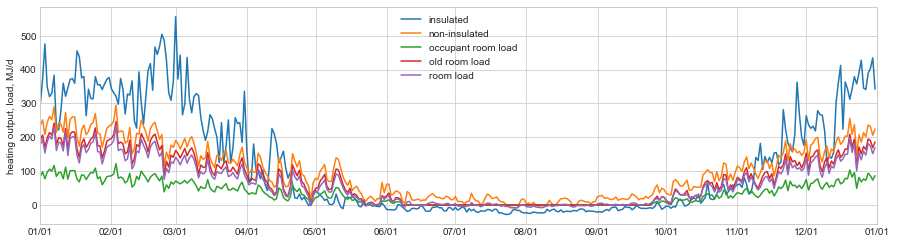

In [10]:
data = [
    (ac.get_heat_source_heating_output(6), 'insulated'),
    (ac.get_heat_source_heating_output(9), 'non-insulated'),
    (np.sum(ac.get_heating_load(9)[0:5], axis=0), 'occupant room load'),
    (np.sum(ac.get_heating_load(9), axis=0), 'old room load'),
    (np.sum(ac.get_heating_load(9)[0:5], axis=0) + ac.get_non_occupant_room_load(9), 'room load')
]

ac.draw_graph('heating output, load, MJ/d', data, op='itg')



暖房負荷が負になってしまう日がある

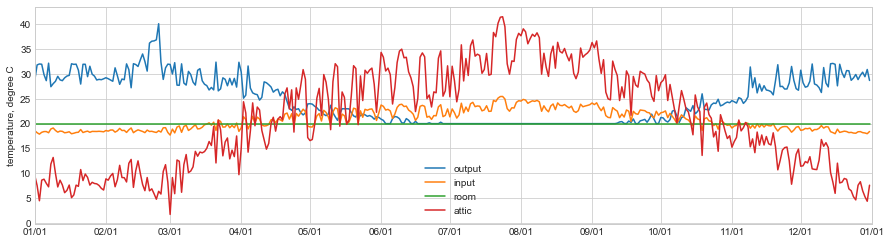

In [11]:
v1 = ac.get_decided_outlet_supply_air_temperature_for_heating(6)
v2 = ac.get_non_occupant_room_temperature_for_heating(6)
v3 = ac.get_air_conditioned_temperature_for_heating(6)
v4 = ac.get_attic_temperature_for_heating(6)
ac.draw_graph('temperature, degree C', [(v1, 'output'),(v2, 'input'), (v3, 'room'), (v4, 'attic')], op='ave')

供給温度は20度を下回らない。

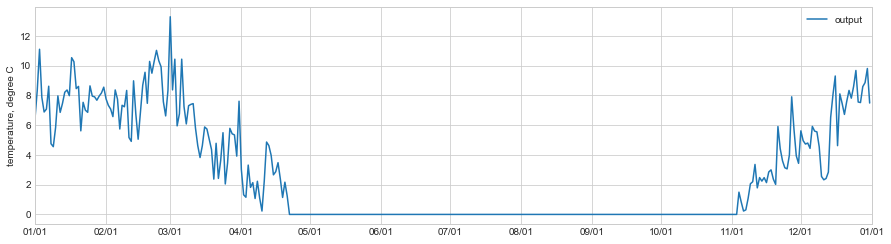

In [12]:
v = np.sum(ac.get_heating_load(6)[0:5], axis=0)
ac.draw_graph('temperature, degree C', [(v, 'output')], op='ave')